<a href="https://colab.research.google.com/github/cosmina98/PhD/blob/main/MLP_ON_VISION_DATASETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# libary imports 
import os
import torch
from torch import nn
import torchvision
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms

import matplotlib.pyplot as plt
import numpy as np

In [30]:
#definining the MLP class
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(32 * 32 * 3, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)
  

In [67]:
torch.manual_seed(42)


# Prepare CIFAR-10 dataset
trainset = CIFAR10(os.getcwd(), download=True, transform=transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)

testset = CIFAR10(os.getcwd(), download=True, transform=transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
testloader = torch.utils.data.DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


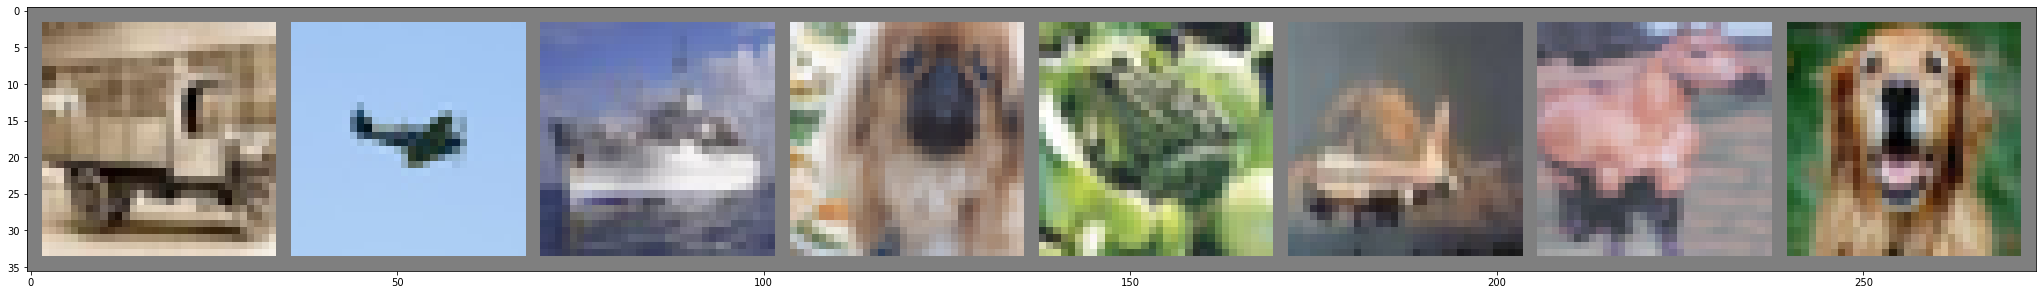

truck plane ship  dog   frog  plane horse dog  


In [71]:
#show data

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.subplots(figsize=(36, 36))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

In [79]:

# Initialize the MLP
mlp = MLP()
  
# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mlp.parameters(), lr=1e-3,momentum=0.9)
optimizer_2 = torch.optim.Adam(mlp.parameters(), lr=1e-4)


In [75]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = mlp(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.247
[1,  4000] loss: 2.105
[1,  6000] loss: 2.001
[2,  2000] loss: 1.921
[2,  4000] loss: 1.857
[2,  6000] loss: 1.825
Finished Training


In [80]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_2.zero_grad()

        # forward + backward + optimize
        outputs = mlp(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer_2.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.902
[1,  4000] loss: 1.708
[1,  6000] loss: 1.635
[2,  2000] loss: 1.576
[2,  4000] loss: 1.557
[2,  6000] loss: 1.518
Finished Training


In [76]:

# Run the training loop
for epoch in range(0, 3): # 3 epochs at maximum
    
    # Print epoch
    print(f'Starting epoch {epoch+1}')
    
    # Set current loss value
    current_loss = 0.0
    
    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):
      
      # Get inputs
      inputs, targets = data
      
      # Zero the gradients
      optimizer.zero_grad()
      
      # Perform forward pass
      outputs = mlp(inputs)
      
      # Compute loss
      loss = loss_function(outputs, targets)
      
      # Perform backward pass
      loss.backward()
      
      # Perform optimization
      optimizer.step()
      
      # Print statistics
      current_loss += loss.item()
      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          current_loss = 0.0

  # Process is complete.
print('Training process has finished.')

Starting epoch 1
Loss after mini-batch   500: 1.775
Loss after mini-batch  1000: 1.799
Loss after mini-batch  1500: 1.765
Loss after mini-batch  2000: 1.730
Loss after mini-batch  2500: 1.787
Loss after mini-batch  3000: 1.735
Loss after mini-batch  3500: 1.749
Loss after mini-batch  4000: 1.729
Loss after mini-batch  4500: 1.727
Loss after mini-batch  5000: 1.721
Loss after mini-batch  5500: 1.711
Loss after mini-batch  6000: 1.698
Starting epoch 2
Loss after mini-batch   500: 1.682
Loss after mini-batch  1000: 1.710
Loss after mini-batch  1500: 1.649
Loss after mini-batch  2000: 1.682
Loss after mini-batch  2500: 1.676
Loss after mini-batch  3000: 1.651
Loss after mini-batch  3500: 1.656
Loss after mini-batch  4000: 1.686
Loss after mini-batch  4500: 1.653
Loss after mini-batch  5000: 1.652
Loss after mini-batch  5500: 1.615
Loss after mini-batch  6000: 1.634
Starting epoch 3
Loss after mini-batch   500: 1.600
Loss after mini-batch  1000: 1.638
Loss after mini-batch  1500: 1.611
Loss